In [61]:
# aquí definimos varias posibles funciones para generar series de tiempo 


# (1) con estructura ARMA(p, q)


import numpy as np
def generar_serie_arma(phi=[], theta=[], sigma=1.0, n=500, seed=None):
    """
    Genera una serie de tiempo con estructura ARMA(p, q)
    
    Parámetros:
        phi (list): coeficientes AR (phi_1, ..., phi_p)
        theta (list): coeficientes MA (theta_1, ..., theta_q)
        sigma (float): desviación estándar del ruido blanco
        n (int): longitud de la serie generada
        seed (int): semilla para reproducibilidad
    
    Retorna:
        y (np.array): serie generada de longitud n
    """
    if seed is not None:
        np.random.seed(seed)

    p = len(phi)
    q = len(theta)
    
    # Inicialización
    y = np.zeros(n)
    e = np.random.normal(0, sigma, size=n + q)  # incluir memoria del MA

    for t in range(max(p, q), n):
        # Parte AR
        ar_sum = sum(phi[i] * y[t - i - 1] for i in range(p))
        # Parte MA
        ma_sum = sum(theta[j] * e[t - j - 1] for j in range(q))
        # Serie
        y[t] = ar_sum + e[t] + ma_sum

    return y

# ---------------------
# EJEMPLO DE USO
# ---------------------
#phi = [0.75, -0.25]     # AR(2)
#theta = [0.65, 0.35]    # MA(2)

#phi = [0.5, -0.3, 0.2, -0.1, 0.05]   # AR(5)
#theta = [0.6, -0.5, 0.4, -0.3]       # MA(4)

phi = [0.0] * 19 + [0.95]  # AR(20) con retardo importante en t-20
theta = []                # sin componente MA
sigma = 0.5


# (2)  con estructura no lineal

def generar_serie_nolineal(n=500, seed=None):
    if seed is not None:
        np.random.seed(seed)
    y = np.zeros(n)
    e = np.random.normal(0, 0.3, size=n)
    for t in range(10, n):
        y[t] = np.sin(y[t-1]) + 0.5*y[t-3] - 0.3*np.tanh(y[t-7]) + e[t]
    return y

# (3) con dependencia retardada

def serie_retardada(n=1000):
    y = np.zeros(n)
    e = np.random.normal(0, 0.1, size=n)
    for t in range(30, n):
        y[t] = np.sin(y[t - 25]) + 0.8*np.tanh(y[t-27])- 0.8*np.tanh(y[t-17]) + e[t]
    return y



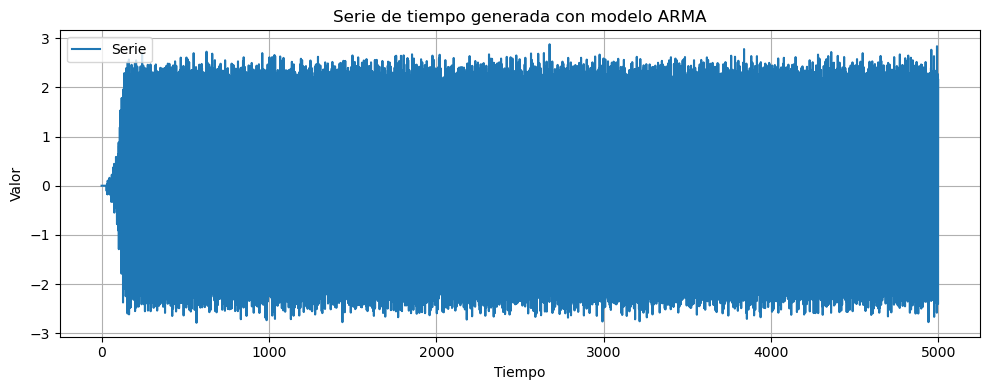

In [62]:

import matplotlib.pyplot as plt

serie = serie_retardada(n=5000)

#serie = generar_serie_arma(phi=phi, theta=theta, sigma=1.0, n=3000, seed=42)

#serie = generar_serie_nolineal(n=3000, seed=42)



# Visualización
plt.figure(figsize=(10, 4))
plt.plot(serie, label="Serie")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.title("Serie de tiempo generada con modelo ARMA")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 10/1000 - Loss: 2.780774
Epoch 20/1000 - Loss: 1.510981
Epoch 30/1000 - Loss: 0.603912
Epoch 40/1000 - Loss: 0.209056
Epoch 50/1000 - Loss: 0.168811
Epoch 60/1000 - Loss: 0.126935
Epoch 70/1000 - Loss: 0.105542
Epoch 80/1000 - Loss: 0.093436
Epoch 90/1000 - Loss: 0.083620
Epoch 100/1000 - Loss: 0.076893
Epoch 110/1000 - Loss: 0.071563
Epoch 120/1000 - Loss: 0.067503
Epoch 130/1000 - Loss: 0.064252
Epoch 140/1000 - Loss: 0.061603
Epoch 150/1000 - Loss: 0.059370
Epoch 160/1000 - Loss: 0.057442
Epoch 170/1000 - Loss: 0.055766
Epoch 180/1000 - Loss: 0.054290
Epoch 190/1000 - Loss: 0.052981
Epoch 200/1000 - Loss: 0.051808
Epoch 210/1000 - Loss: 0.050753
Epoch 220/1000 - Loss: 0.049792
Epoch 230/1000 - Loss: 0.048922
Epoch 240/1000 - Loss: 0.048123
Epoch 250/1000 - Loss: 0.047373
Epoch 260/1000 - Loss: 0.046686
Epoch 270/1000 - Loss: 0.046078
Epoch 280/1000 - Loss: 0.045527
Epoch 290/1000 - Loss: 0.045016
Epoch 300/1000 - Loss: 0.044535
Epoch 310/1000 - Loss: 0.044078
Epoch 320/1000 - 

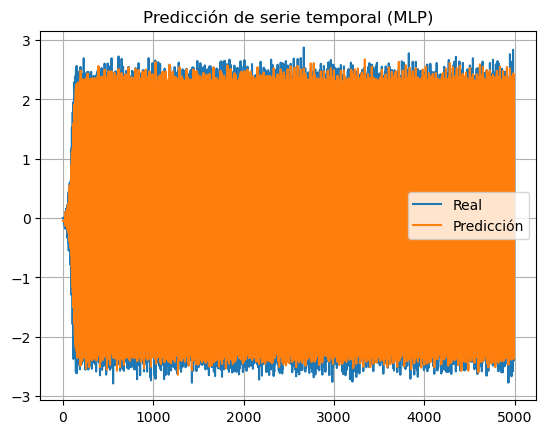

In [63]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# ------------------------
# Parámetros del modelo
# ------------------------
n_steps = 10  # ventana de entrada
hidden_dim1 = 64
hidden_dim2 = 32
lr = 0.001
epochs = 1000

# ------------------------
# 1. Generar dataset con ventana deslizante
# ------------------------
def create_dataset(series, n_steps):
    X, y = [], []
    for i in range(len(series) - n_steps):
        X.append(series[i:i+n_steps])
        y.append(series[i+n_steps])
    return np.array(X), np.array(y)

# ADAPTACIÓN: usar directamente la serie 'Series'
X_np = np.array(serie).astype(np.float32)
X_data, y_data = create_dataset(X_np, n_steps)

# Convertir a tensores de PyTorch
X_tensor = torch.tensor(X_data, dtype=torch.float32)
y_tensor = torch.tensor(y_data, dtype=torch.float32).unsqueeze(1)

# ------------------------
# 2. Definir red neuronal
# ------------------------
class FeedforwardNN(nn.Module):
    def __init__(self, input_size, hidden1, hidden2):
        super(FeedforwardNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, hidden1),
            nn.ReLU(),
            nn.Linear(hidden1, hidden2),
            nn.ReLU(),
            nn.Linear(hidden2, 1)  # predicción escalar
        )
        
    def forward(self, x):
        return self.net(x)

model = FeedforwardNN(input_size=n_steps, hidden1=hidden_dim1, hidden2=hidden_dim2)

# ------------------------
# 3. Definir pérdida y optimizador
# ------------------------
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

# ------------------------
# 4. Entrenamiento
# ------------------------
for epoch in range(epochs):
    model.train()
    output = model(X_tensor)
    loss = criterion(output, y_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs} - Loss: {loss.item():.6f}")

# ------------------------
# 5. Inferencia (predicción sobre conjunto de entrada)
# ------------------------
model.eval()
with torch.no_grad():
    preds = model(X_tensor).squeeze()

# Visualización rápida (opcional)
import matplotlib.pyplot as plt
plt.plot(range(len(y_tensor)), y_tensor.numpy(), label='Real')
plt.plot(range(len(preds)), preds.numpy(), label='Predicción')
plt.legend()
plt.title("Predicción de serie temporal (MLP)")
plt.grid(True)
plt.show()


Entrada (10 pasos, 1 valor c/u)
        ↓
LSTM (hidden_lstm = 50) → vector de 50
        ↓
Capa densa (hidden_fc = 32) → vector de 32
        ↓
Capa de salida → predicción escalar


Epoch 10/1000 - Loss: 3.810086
Epoch 20/1000 - Loss: 3.053534
Epoch 30/1000 - Loss: 1.600455
Epoch 40/1000 - Loss: 0.778055
Epoch 50/1000 - Loss: 0.579460
Epoch 60/1000 - Loss: 0.522359
Epoch 70/1000 - Loss: 0.506212
Epoch 80/1000 - Loss: 0.492169
Epoch 90/1000 - Loss: 0.469501
Epoch 100/1000 - Loss: 0.442668
Epoch 110/1000 - Loss: 0.382038
Epoch 120/1000 - Loss: 0.329652
Epoch 130/1000 - Loss: 0.264868
Epoch 140/1000 - Loss: 0.195980
Epoch 150/1000 - Loss: 0.143899
Epoch 160/1000 - Loss: 0.106997
Epoch 170/1000 - Loss: 0.087787
Epoch 180/1000 - Loss: 0.079619
Epoch 190/1000 - Loss: 0.074510
Epoch 200/1000 - Loss: 0.069635
Epoch 210/1000 - Loss: 0.067185
Epoch 220/1000 - Loss: 0.062355
Epoch 230/1000 - Loss: 0.060962
Epoch 240/1000 - Loss: 0.057931
Epoch 250/1000 - Loss: 0.057060
Epoch 260/1000 - Loss: 0.053747
Epoch 270/1000 - Loss: 0.052579
Epoch 280/1000 - Loss: 0.050469
Epoch 290/1000 - Loss: 0.049949
Epoch 300/1000 - Loss: 0.048829
Epoch 310/1000 - Loss: 0.047286
Epoch 320/1000 - 

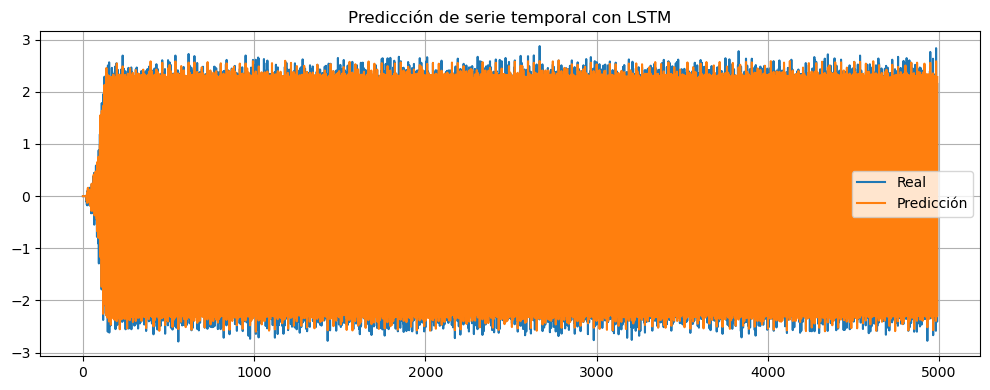

In [64]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# ------------------------
# Parámetros del modelo
# ------------------------
n_steps = 10
lr = 0.001
epochs = 1000

# ------------------------
# 1. Generar dataset con ventana deslizante
# ------------------------
def create_dataset(series, n_steps):
    X, y = [], []
    for i in range(len(series) - n_steps):
        X.append(series[i:i+n_steps])
        y.append(series[i+n_steps])
    return np.array(X), np.array(y)

# Supón que 'serie' ya está definida (np.array) o generada con una función ARMA/otra
X_np = np.array(serie).astype(np.float32)
X_data, y_data = create_dataset(X_np, n_steps)

# Convertir a tensores de PyTorch con la forma adecuada para LSTM
X_tensor = torch.tensor(X_data, dtype=torch.float32).unsqueeze(2)  # (batch, seq_len, 1)
y_tensor = torch.tensor(y_data, dtype=torch.float32).unsqueeze(1)  # (batch, 1)

# ------------------------
# 2. Definir red neuronal con LSTM
# ------------------------
class LSTMModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=1,
            hidden_size=128,
            num_layers=2,
            batch_first=True,
            dropout=0.2
        )
        self.fc = nn.Linear(128, 1)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        last_output = lstm_out[:, -1, :]  # tomar el último paso temporal
        return self.fc(last_output)

# Inicializar modelo
model = LSTMModel()

# ------------------------
# 3. Definir pérdida y optimizador
# ------------------------
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

# ------------------------
# 4. Entrenamiento
# ------------------------
for epoch in range(epochs):
    model.train()
    output = model(X_tensor)
    loss = criterion(output, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs} - Loss: {loss.item():.6f}")

# ------------------------
# 5. Inferencia
# ------------------------
model.eval()
with torch.no_grad():
    preds = model(X_tensor).squeeze()

# ------------------------
# 6. Visualización
# ------------------------
plt.figure(figsize=(10, 4))
plt.plot(y_tensor.numpy(), label="Real")
plt.plot(preds.numpy(), label="Predicción")
plt.legend()
plt.title("Predicción de serie temporal con LSTM")
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 10/1000 - Loss: 3.148509
Epoch 20/1000 - Loss: 2.003198
Epoch 30/1000 - Loss: 0.767139
Epoch 40/1000 - Loss: 0.242676
Epoch 50/1000 - Loss: 0.152213
Epoch 60/1000 - Loss: 0.123305
Epoch 70/1000 - Loss: 0.107700
Epoch 80/1000 - Loss: 0.095434
Epoch 90/1000 - Loss: 0.088443
Epoch 100/1000 - Loss: 0.082239
Epoch 110/1000 - Loss: 0.077121
Epoch 120/1000 - Loss: 0.072845
Epoch 130/1000 - Loss: 0.069113
Epoch 140/1000 - Loss: 0.065814
Epoch 150/1000 - Loss: 0.062905
Epoch 160/1000 - Loss: 0.060342
Epoch 170/1000 - Loss: 0.058080
Epoch 180/1000 - Loss: 0.056059
Epoch 190/1000 - Loss: 0.054246
Epoch 200/1000 - Loss: 0.052621
Epoch 210/1000 - Loss: 0.051162
Epoch 220/1000 - Loss: 0.049847
Epoch 230/1000 - Loss: 0.048662
Epoch 240/1000 - Loss: 0.047602
Epoch 250/1000 - Loss: 0.046648
Epoch 260/1000 - Loss: 0.045777
Epoch 270/1000 - Loss: 0.044990
Epoch 280/1000 - Loss: 0.044289
Epoch 290/1000 - Loss: 0.043661
Epoch 300/1000 - Loss: 0.043098
Epoch 310/1000 - Loss: 0.042591
Epoch 320/1000 - 

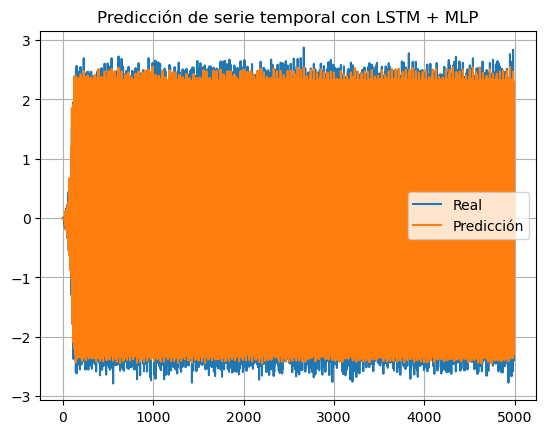

In [65]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# ------------------------
# Parámetros del modelo
# ------------------------
n_steps = 10  # ventana de entrada
hidden_dim1 = 64
hidden_dim2 = 32
lstm_hidden = 64
lr = 0.001
epochs = 1000

# ------------------------
# 1. Generar dataset con ventana deslizante
# ------------------------
def create_dataset(series, n_steps):
    X, y = [], []
    for i in range(len(series) - n_steps):
        X.append(series[i:i+n_steps])
        y.append(series[i+n_steps])
    return np.array(X), np.array(y)

# Supón que 'serie' ya está definida
X_np = np.array(serie).astype(np.float32)
X_data, y_data = create_dataset(X_np, n_steps)

# Convertir a tensores
X_seq = torch.tensor(X_data, dtype=torch.float32).unsqueeze(2)  # (batch, seq_len, 1)
X_flat = torch.tensor(X_data, dtype=torch.float32)              # (batch, seq_len)
y_tensor = torch.tensor(y_data, dtype=torch.float32).unsqueeze(1)

# ------------------------
# 2. Red neuronal con LSTM + combinación h_t y x_t
# ------------------------
class HybridLSTMModel(nn.Module):
    def __init__(self, seq_len, lstm_hidden, hidden1, hidden2):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=lstm_hidden, batch_first=True)
        self.fc = nn.Sequential(
            nn.Linear(lstm_hidden + seq_len, hidden1),
            nn.ReLU(),
            nn.Linear(hidden1, hidden2),
            nn.ReLU(),
            nn.Linear(hidden2, 1)
        )

    def forward(self, x_seq, x_flat):
        lstm_out, _ = self.lstm(x_seq)              # lstm_out: (batch, seq_len, lstm_hidden)
        h_t = lstm_out[:, -1, :]                    # último estado oculto
        concat = torch.cat([h_t, x_flat], dim=1)    # [h_t ; x_t]
        return self.fc(concat)

model = HybridLSTMModel(seq_len=n_steps, lstm_hidden=lstm_hidden,
                        hidden1=hidden_dim1, hidden2=hidden_dim2)

# ------------------------
# 3. Pérdida y optimizador
# ------------------------
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

# ------------------------
# 4. Entrenamiento
# ------------------------
for epoch in range(epochs):
    model.train()
    output = model(X_seq, X_flat)
    loss = criterion(output, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs} - Loss: {loss.item():.6f}")

# ------------------------
# 5. Inferencia
# ------------------------
model.eval()
with torch.no_grad():
    preds = model(X_seq, X_flat).squeeze()

# ------------------------
# 6. Visualización
# ------------------------
plt.plot(range(len(y_tensor)), y_tensor.numpy(), label='Real')
plt.plot(range(len(preds)), preds.numpy(), label='Predicción')
plt.legend()
plt.title("Predicción de serie temporal con LSTM + MLP")
plt.grid(True)
plt.show()


Epoch 0, total reward: 2.7351, epsilon: 0.9950
Epoch 10, total reward: -3.1958, epsilon: 0.9464
Epoch 20, total reward: -0.5515, epsilon: 0.9001
Epoch 30, total reward: 1.9493, epsilon: 0.8561
Epoch 40, total reward: 2.3402, epsilon: 0.8142
Epoch 50, total reward: 13.8856, epsilon: 0.7744
Epoch 60, total reward: 3.1159, epsilon: 0.7366
Epoch 70, total reward: 7.3517, epsilon: 0.7005
Epoch 80, total reward: 6.5734, epsilon: 0.6663
Epoch 90, total reward: 9.4163, epsilon: 0.6337
Epoch 100, total reward: 11.4360, epsilon: 0.6027
Epoch 110, total reward: 17.0886, epsilon: 0.5733
Epoch 120, total reward: 10.2838, epsilon: 0.5452
Epoch 130, total reward: 15.3755, epsilon: 0.5186
Epoch 140, total reward: 17.5058, epsilon: 0.4932
Epoch 150, total reward: 19.1463, epsilon: 0.4691
Epoch 160, total reward: 14.6409, epsilon: 0.4462
Epoch 170, total reward: 15.4429, epsilon: 0.4244
Epoch 180, total reward: 20.5585, epsilon: 0.4036
Epoch 190, total reward: 21.7769, epsilon: 0.3839


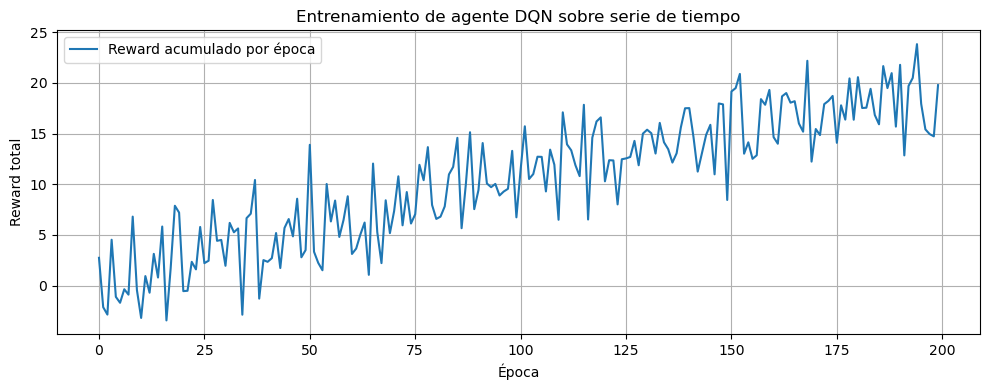

In [43]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import matplotlib.pyplot as plt

# -------------------------
# Generar serie de tiempo simple
# -------------------------
np.random.seed(42)
serie = np.sin(np.linspace(0, 50, 500)) + np.random.normal(0, 0.1, 500)

# -------------------------
# Definir red neuronal para Q-learning
# -------------------------
class QNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(state_size, 64),
            nn.ReLU(),
            nn.Linear(64, action_size)
        )

    def forward(self, x):
        return self.fc(x)

# -------------------------
# Hiperparámetros
# -------------------------
n_steps = 5
state_size = n_steps
action_size = 3  # [mantener, comprar, vender]
epsilon = 1.0
epsilon_min = 0.05
epsilon_decay = 0.995
gamma = 0.95
lr = 0.001
epochs = 200

# -------------------------
# Inicialización del agente
# -------------------------
model = QNetwork(state_size, action_size)
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.MSELoss()

reward_history = []

# -------------------------
# Entrenamiento
# -------------------------
for epoch in range(epochs):
    total_reward = 0.0
    for t in range(n_steps, len(serie) - 1):
        # Estado actual: ventana de n_steps
        state = torch.tensor(serie[t - n_steps:t], dtype=torch.float32).unsqueeze(0)

        # Política ε-greedy
        if random.random() < epsilon:
            action = random.randint(0, action_size - 1)
        else:
            with torch.no_grad():
                q_values = model(state)
                action = torch.argmax(q_values).item()

        # Recompensa (ganancia potencial)
        price_now = serie[t]
        price_next = serie[t + 1]
        reward = 0.0
        if action == 1:  # comprar
            reward = price_next - price_now
        elif action == 2:  # vender
            reward = price_now - price_next

        # Estado siguiente
        next_state = torch.tensor(serie[t + 1 - n_steps:t + 1], dtype=torch.float32).unsqueeze(0)

        # Q-target
        with torch.no_grad():
            next_q = model(next_state).max().item()
        target_q = reward + gamma * next_q

        # Q estimado
        output_q = model(state)[0, action]
        loss = criterion(output_q, torch.tensor(target_q, dtype=torch.float32))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_reward += reward

    # Decaimiento de epsilon
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

    reward_history.append(total_reward)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, total reward: {total_reward:.4f}, epsilon: {epsilon:.4f}")

# -------------------------
# Visualización
# -------------------------
plt.figure(figsize=(10, 4))
plt.plot(reward_history, label='Reward acumulado por época')
plt.xlabel("Época")
plt.ylabel("Reward total")
plt.title("Entrenamiento de agente DQN sobre serie de tiempo")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
